## Project 5: Cunting Experiments, Interrupts

### Abstract & Description:

In this project, we introduce a new concept called Interrupts. Until now, we have only been using buttons and other hardware to control the changes that happen to our program and manipulate outputs. This method does not really work for more complex programs. We have noticed that with this method we can easily miss information or data for experiments that run with high frequency or occurs very often in a single instant. That is where the new concept called interrupt is handy because of its efficiency. An interrupt, in microcontroller context, is a signal that temporarily stops what the CPU is currently working on and execute some specific orders.

### Circuit schematic, Background and Discussion


In this project, we'll explore the practical aspects of several types of "counting" experiments.

One of the most common scenarios involves some kind of event that occurs periodically that you'd like to capture. A simple example of this is the detection of a nuclear decay process. There are naturally occurring atomic nuclei in nature that are not "stable". Some of these nuclei end up in products that you may have encountered in your daily life. Others can be applied in medical treatments or diagnostic equipment. We could write a program that measures the time between pulses from a Gieger-Muller Tube (GMT) exposed to a radioactive source.
The output of the GMT is normally 5V. When the GMT detects a particle it will emit a short pulse on its output pin during which the pin voltage drops momentarily to zero, and then quickly, back to 5V. We can set up an "interrupt" routine on the Arduino that runs only when this event occurs. We can "attach" an interrupt routine to a particular hardware event using "attachInterrupt" like so:

    attachInterrupt(digitalPinToInterrupt(pin number), ISR function name, interrupt mode);
    
As described in the [Arduino](https://www.arduino.cc/reference/en/language/functions/external-interrupts/attachinterrupt/) official website, the attachInterrupt function is used as it follows:

The first parameter to attachInterrupt() is an interrupt number. Normally you should use digitalPinToInterrupt(pin) to translate the actual digital pin to the specific interrupt number. For example, if you connect to pin 3, use digitalPinToInterrupt(3) as the first parameter to attachInterrupt().


##### Parameters:
interrupt: the number of the interrupt (int)
pin: the pin number
ISR: the ISR to call when the interrupt occurs; this function must take no parameters and return nothing. This function is sometimes referred to as an interrupt service routine.
mode: defines when the interrupt should be triggered. Four constants are predefined as valid values:

##### LOW:

to trigger the interrupt whenever the pin is low,

##### CHANGE:

to trigger the interrupt whenever the pin changes value

##### RISING:

to trigger when the pin goes from low to high,

##### FALLING:

for when the pin goes from high to low.

The Due, Zero and MKR1000 boards allows also:

##### HIGH:

to trigger the interrupt whenever the pin is high.

### Circuit Function

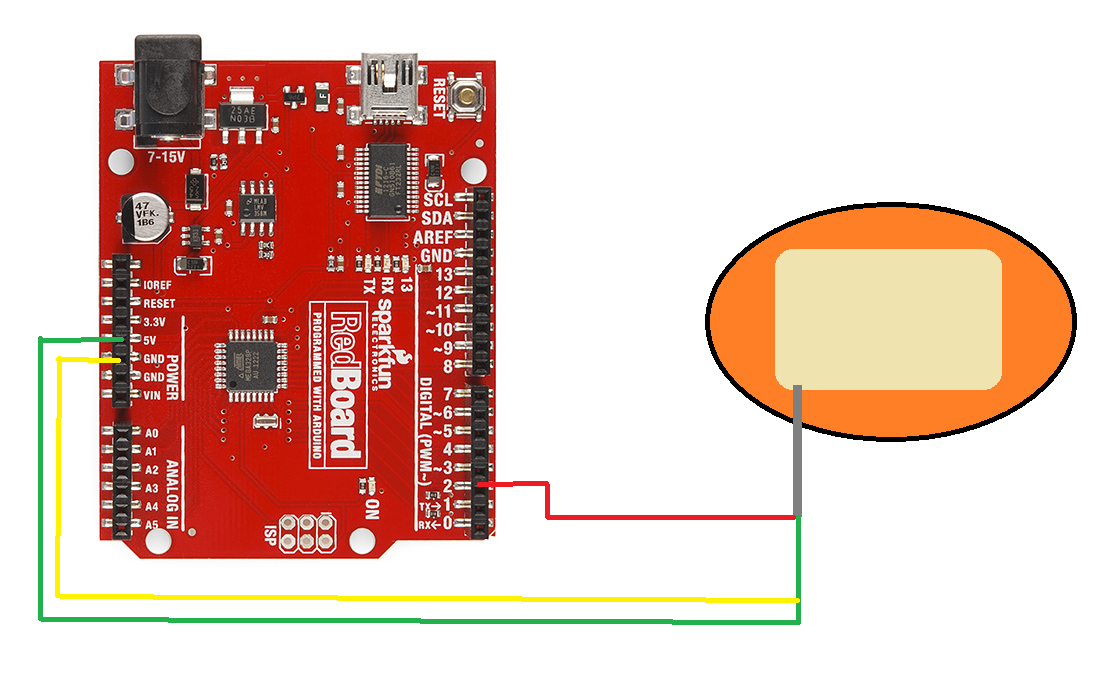

In [272]:
from IPython.display import Image
Image(filename='rad.png', width = 320,height=240)

    volatile long int count = 0L;
    // Long integer value with all the bits set to zero

    void setup()
    {
      pinMode(13, OUTPUT);       // pin 13 defined as Output 
      Serial.begin(9600);      // start serial port at 9600 bps:
      attachInterrupt(digitalPinToInterrupt(2), click, CHANGE); #Interrupt func
    }

    void click() {
      count++;               #Variable that counts
      digitalWrite(13, ((count>>3) & 0x01));    //Bitwise operation
      
    }

    void loop()
    {
      delay(1000); // Wait for 1000 millisecond(s)
      Serial.println(count);      //Print on the serial monitor
      count=0L;    // Long integer value with all the bits set to zero
    }

### Results



In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
from scipy.stats import poisson
from scipy.special import binom
from scipy.stats import norm

dg = pd.read_csv('Pulses.csv')
dg.head()


,28
0,51
1,28
2,52
3,46
4,28


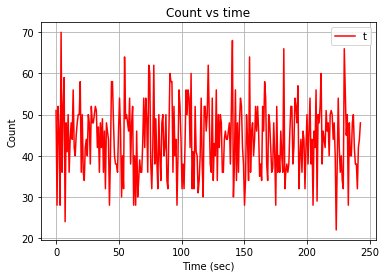

In [288]:
dg = dg.rename(columns={'28': 't'})
x = np.linspace(0,len(dg.t)*0.8,len(dg.t))
plt.plot(x,dg.t,'r-')
plt.title("Count vs time")
plt.grid()
plt.xlabel("Time (sec)")
plt.ylabel("Count")

plt.legend()


In [412]:
mean = (dg.t).sum()/len(dg.t)
print("->Mean: ",mean)
print("->Max: ",max(dg.t))
print("->Min :",min(dg.t))

->Mean:  43.993399339933994
->Max:  70
->Min : 22


### STATS EXERCISES

In [402]:

results = []
N=40
lam=20

for ndefects in range(N+1):
    prob = poisson.pmf(ndefects, lam)
    results.append({'n':ndefects, 'p':prob})
    
df = pd.DataFrame(results)


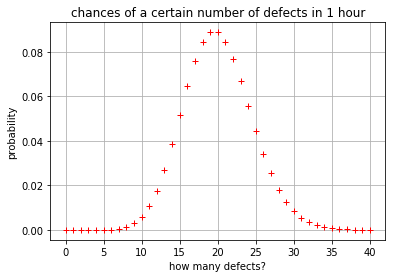

In [403]:
pl.plot(df.n,df.p,'r+')
pl.title("chances of a certain number of defects in 1 hour")
pl.xlabel("how many defects?")
pl.ylabel("probability")
pl.grid()

In [404]:
df.p.sum()

0.9999745736817622

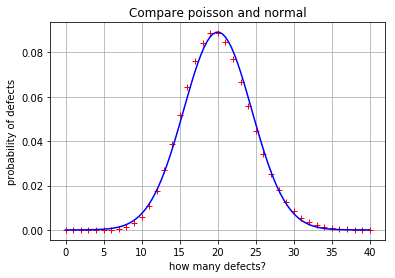

In [405]:
hrange=np.linspace(df.n.values[0],df.n.values[-1],100)
nd = norm.pdf(hrange,loc=lam,scale=np.sqrt(lam))
pl.plot(df.n,df.p,'r+')
pl.plot(hrange,nd,'b-')
pl.title("Compare poisson and normal")
pl.xlabel("how many defects?")
pl.ylabel("probability of defects")
pl.grid()

First we changed N in order to observe how it behaves after a long time. 
AFter some iterations with N=40, lambda at 20, which is the half of N, we obtained a nice looking curve.


In [395]:
mean = (dg.t).sum()/len(dg.t)
x = poisson.rvs(size=169,mu=mean)

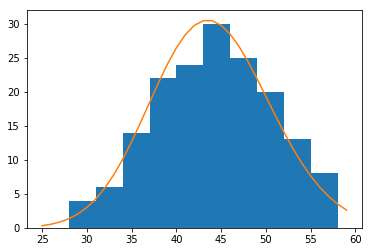

In [414]:
bins = np.arange(25,60,3)
pl.hist(x,bins)
binwidth=bins[1]-bins[0]
n= np.arange(25,60)
pl.plot(n,poisson.pmf(k=n,mu=mean)*169*binwidth)


### Conclusion

This experiment is all about interrupt. An interrupt, in microcontroller context, is a signal that temporarily stops what the CPU is currently working on and execute some specific orders.
We wrote a program that measures the time between pulses from a Gieger-Muller Tube (GMT) exposed to a radioactive source. 
we obtained :

###### ->Mean:  43.9


###### ->Max:  70


###### ->Min : 22

The stats exercises was about generating a Poisson distribution and compare it to a normal distribution of the seme mean. And then, use the same idea of poisson distribution and consider the mean obtained for counts as a parameter. 